In [1]:
%matplotlib inline
import twixtools
import numpy as np
import matplotlib.pyplot as plt
import os

example_dir = '../example_data'

def ifftnd(sig, axes=[-1]):
    out = sig.copy()
    for axis in axes:
        out = np.fft.fftshift(np.fft.ifft(np.fft.ifftshift(out, axes=[axis]), axis=axis), axes=[axis])
    return out


def fftnd(sig, axes=[-1]):
    out = sig.copy()
    for axis in axes:
        out = np.fft.fftshift(np.fft.fft(np.fft.ifftshift(data, axes=[axis]), axis=axis), axes=[axis])
    return out

def rms_comb(sig, axis=1):
    return np.sqrt(np.sum(abs(sig)**2, axis))

In [22]:
twix_epi = twixtools.read_twix(os.path.join(example_dir, 'meas_MID00269_FID117232_ep2d_bold.dat'))
epi = twixtools.map_twix(twix_epi)

pc_array = epi[-1]['phasecorr']
im_array = epi[-1]['image']

Software version: VD/VE (!?)

Scan  0
100 % parsed in 0 s. Estimated 0 s remaining.
Scan  1
100 % parsed in 0 s. Estimated 0 s remaining.


In [95]:
# set averaging flags
pc_array.flags['remove_os'] = True
pc_array.flags['average']['Ave']=True
pc_array.flags['average']['Lin']=True
pc_array.flags['average']['Par']=True

# print singleton_dims, to make sure that we select the correct data + shape
print(pc_array.non_singleton_dims)

# phase difference in image space by complex multiplication (keeps magnitude for weighted average)
pc = ifftnd(pc_array[:])
pc = pc[:,:,:,:,:,[0]] * np.conj(pc[:,:,:,:,:,[1]])

# plot phase difference for all channels
plt.plot(np.angle(pc.squeeze()).T)

IndentationError: unexpected indent (<ipython-input-95-5653a760567d>, line 12)

['Lin', 'Cha', 'Col']
(1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 80, 8, 80)
(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)


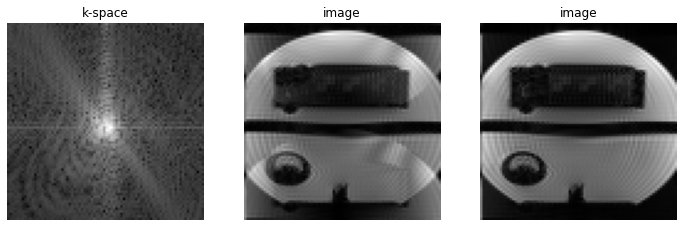

In [104]:
im_array.flags['remove_os'] = True
im_array.flags['average']['Seg'] = True
print(im_array.non_singleton_dims)

data = im_array[:].squeeze()

plt.figure(figsize=[12,8])
plt.subplot(131)
plt.title('k-space')
plt.imshow(abs(data[:,0])**0.2, cmap='gray')
plt.axis('off')

image = ifftnd(data, [0,-1])
image = rms_comb(image)
plt.subplot(132)
plt.title('image')
plt.imshow(image, cmap='gray')
plt.axis('off')

im_array.flags['average']['Seg'] = False

pc = ifftnd(pc_array[:])

x = np.arange(pc_array.shape[-1]) - pc_array.shape[-1]//2

# calculate phase slope from autocorrelation (for both readout polarities separately - each in its own dim)
slope = np.angle((np.conj(pc[...,1:]) * pc[...,:-1]).sum(-1,keepdims=True).sum(-2,keepdims=True))
pc_corr = np.exp(1j * slope * x)

data = im_array[:]
image = ifftnd(data, [-1])
# apply slope
image *= pc_corr
image = image.sum(5).squeeze()
image = ifftnd(image, [0])

image = rms_comb(image)
plt.subplot(133)
plt.title('image')
plt.imshow(image, cmap='gray')
plt.axis('off')

print(im_array.shape)
print(pc_angle.shape)

Software version: VD/VE (!?)

Scan  0
100 % parsed in 0 s. Estimated 0 s remaining.
['Rep', 'Lin', 'Cha', 'Col']


(-0.5, 127.5, 127.5, -0.5)

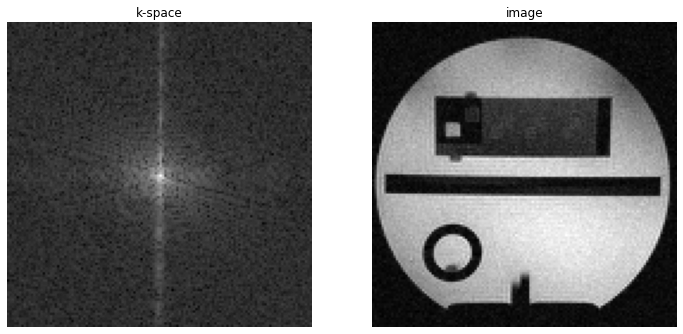

In [82]:
twix_singlechan = twixtools.read_twix(os.path.join(example_dir, 'meas_MID00273_FID117236_gre_bodycoil.dat'))
singlechan = twixtools.map_twix(twix_singlechan)
im_data = singlechan[-1]['image']
print(im_data.non_singleton_dims)
im_data.flags['remove_os'] = True
data = im_data[:].squeeze()[0]

plt.figure(figsize=[12,8])
plt.subplot(121)
plt.title('k-space')
plt.imshow(abs(data[:,0])**0.2, cmap='gray')
plt.axis('off')


image = ifftnd(data, [0,-1])
image = rms_comb(image)
plt.subplot(122)
plt.title('image')
plt.imshow(abs(image), cmap='gray')
plt.axis('off')

In [16]:
print(im_data.shape)
print(im_data[0].shape)
print(im_data[[0]*5].shape)

(1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 128, 2, 128)
(1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 128, 2, 128)
(5, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 128, 2, 128)


In [79]:
pc.shape

(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 80)

In [18]:
print(a[[0]*5].shape)

(5, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 128, 2, 128)


In [47]:
pc_angle = np.angle(pc.sum(-1, keepdims=True))
x = np.arange(data.shape[-1]) - data.shape[-1]//2

In [49]:
pc_angle.shape
x.shape

(80,)

In [51]:
(pc_angle * x).shape

(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 80)

In [52]:
pc_angle.shape

(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1)